<a href="https://colab.research.google.com/github/Janhavi-127/Data-Analyst-Project-Basic-to-Advanced/blob/main/ABG_India_Launchpad.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Step 1: Data Understanding and Preparation

1.1 Load Data

In [ ]:
import pandas as pd

In [ ]:
# Load the Indian dataset
df_india = pd.read_csv('IN_Data.csv')

# Load the Japanese dataset
df_japan = pd.read_csv('JPN Data.csv')

1.2 Exploratory Data Analysis (EDA)

In [ ]:
# For Indian Dataset  (repeat similar steps for Japanese Dataset)
# Display basic information about the Indian dataset

print("\n--- Indian Dataset Overview ---")

print("Shape (rows, columns):", df_india.shape)
print("\nFirst 5 rows:")
print(df_india.head())
print("\nColumn information (data types, non-null counts):")
print(df_india.info())
print("\nMissing values count per column:")
print(df_india.isnull().sum())
print("\nSummary statistics for numerical columns:")
print(df_india.describe())

# Example for unique values and value counts for a hypothetical 'Gender' column
# (Replace 'Gender' with actual column names from your dataset)
if 'Gender' in df_india.columns:
    print("\nUnique values in 'Gender' column:")
    print(df_india['Gender'].unique())
    print("\nValue counts for 'Gender' column:")
    print(df_india['Gender'].value_counts())


--- Indian Dataset Overview ---
Shape (rows, columns): (70000, 5)

First 5 rows:
           ID  CURR_AGE GENDER   ANN_INCOME   DT_MAINT
0  20710B05XL        54      M   1,425,390   4/20/2018
1  89602T51HX        47      M   1,678,954    6/8/2018
2  70190Z52IP        60      M     931,624   7/31/2017
3  25623V15MU        55      F   1,106,320   7/31/2017
4  36230I68CE        32      F     748,465   1/27/2019

Column information (data types, non-null counts):
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   ID          70000 non-null  object
 1   CURR_AGE    70000 non-null  int64 
 2   GENDER      70000 non-null  object
 3   ANN_INCOME  70000 non-null  object
 4   DT_MAINT    70000 non-null  object
dtypes: int64(1), object(4)
memory usage: 2.7+ MB
None

Missing values count per column:
ID            0
CURR_AGE      0
GENDER        0
ANN_INCOME  

In [ ]:
# For Japanese Dataset
# Display basic information about the Japanese Dataset

print("\n--- Japanese Dataset Overview ---")
print("Shape (rows, columns):", df_japan.shape)
print("\nFirst 5 rows:")
print(df_japan.head())
print("\nColumn information (data types, non-null counts):")
print(df_japan.info())
print("\nMissing values count per column:")
print(df_japan.isnull().sum())
print("\nSummary statistics for numerical columns:")
print(df_japan.describe())

# Example for unique values and value counts for a hypothetical 'Gender' column
# (Replace 'Gender' with actual column names from your dataset if it exists)
if 'Gender' in df_japan.columns:
    print("\nUnique values in 'Gender' column:")
    print(df_japan['Gender'].unique())
    print("\nValue counts for 'Gender' column:")
    print(df_japan['Gender'].value_counts())



--- Japanese Dataset Overview ---
Shape (rows, columns): (40000, 6)

First 5 rows:
           ID  CURR_AGE GENDER ANN_INCOME  AGE_CAR  PURCHASE
0  00001Q15YJ        50      M    445,344      439         0
1  00003I71CQ        35      M    107,634      283         0
2  00003N47FS        59      F    502,787      390         1
3  00005H41DE        43      M    585,664      475         0
4  00007E17UM        39      F    705,723      497         1

Column information (data types, non-null counts):
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   ID          40000 non-null  object
 1   CURR_AGE    40000 non-null  int64 
 2   GENDER      40000 non-null  object
 3   ANN_INCOME  40000 non-null  object
 4   AGE_CAR     40000 non-null  int64 
 5   PURCHASE    40000 non-null  int64 
dtypes: int64(3), object(3)
memory usage: 1.8+ MB
None

Missing values 

1.3 Data Cleaning and Preprocessing

1.3.1 Handle Missing Values:
Imputation

In [ ]:
# Example: Imputing missing numerical values with the median
# (Apply this for relevant numerical columns in both datasets)

if 'Income' in df_india.columns and df_india['Income'].isnull().any():
    df_india['Income'].fillna(df_india['Income'].median(), inplace=True)
    print("Missing 'Income' values in Indian dataset imputed with median.")


# Example: Imputing missing categorical values with the mode
# (Apply this for relevant categorical columns in both datasets)

if 'Education' in df_india.columns and df_india['Education'].isnull().any():
    mode_education = df_india['Education'].mode()[0]
    df_india['Education'].fillna(mode_education, inplace=True)
    print("Missing 'Education' values in Indian dataset imputed with mode.")

1.3.2 Address Outliers: Simple Capping - for a numerical column like 'Age'

In [ ]:
# Example: Capping outliers for 'Age' column (e.g., cap values above 99th percentile)
# (Apply this for relevant numerical columns in both datasets)

if 'Age' in df_india.columns:
    upper_bound_age = df_india['Age'].quantile(0.99)
    df_india['Age'] = df_india['Age'].clip(upper=upper_bound_age)
    print("Outliers in 'Age' column of Indian dataset capped.")

1.3.3 Feature Engineering: Creating Age Groups

In [ ]:
# Example: Creating 'AgeGroup' from 'Age'
# (Apply this for relevant numerical columns in both datasets)

if 'Age' in df_india.columns:
    bins = [0, 18, 35, 55, 100]
    labels = ['Child', 'Young Adult', 'Middle-Aged', 'Senior']
    df_india['AgeGroup'] = pd.cut(df_india['Age'], bins=bins, labels=labels, right=False)
    print("'AgeGroup' feature created for Indian dataset.")

1.3.4 Categorical Variable Encoding:
One-Hot Encoding

In [ ]:
# Example: One-hot encoding for a nominal categorical column like 'City'
# (Identify all nominal categorical columns in both datasets and apply)

categorical_cols_india = [] # Example columns, adjust as per your data
df_india = pd.get_dummies(df_india, columns=categorical_cols_india, drop_first=True) # drop_first avoids multicollinearity
print("Categorical columns in Indian dataset one-hot encoded.")

Categorical columns in Indian dataset one-hot encoded.


1.3.5 Feature Scaling:Python Code Example (Standardization - for numerical columns after splitting data):

In [ ]:
from sklearn.preprocessing import StandardScaler

# Assuming you've already split your data into X_train, X_test
# (This step typically comes after splitting the data for model building)

# Identify numerical columns to scale (excluding any encoded binary columns)
numerical_cols_to_scale_india = ['Age', 'Income', 'Monthly_Spend'] # Example, adjust as per your data
scaler = StandardScaler()

# Fit on training data and transform both
# X_train[numerical_cols_to_scale_india] = scaler.fit_transform(X_train[numerical_cols_to_scale_india])
# X_test[numerical_cols_to_scale_india] = scaler.transform(X_test[numerical_cols_to_scale_india])
# print("Numerical features in Indian dataset scaled.")

Step 2: Classification Model over Japanese Datase

2.1 Preprocessing Specific to Japanese Dataset

In [ ]:
# Clean and convert 'ANN_INCOME' to numeric

if 'ANN_INCOME' in df_japan.columns:

    # Remove commas and convert to numeric

    df_japan['ANN_INCOME'] = df_japan['ANN_INCOME'].str.replace(',', '').astype(float)
    print("ANN_INCOME column cleaned and converted to numeric.")
else:
    print("ANN_INCOME column not found in Japanese dataset.")

# Verify the data type

print("\nUpdated Dtypes for Japanese Dataset:")
print(df_japan.info())

ANN_INCOME column cleaned and converted to numeric.

Updated Dtypes for Japanese Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   ID          40000 non-null  object 
 1   CURR_AGE    40000 non-null  int64  
 2   GENDER      40000 non-null  object 
 3   ANN_INCOME  40000 non-null  float64
 4   AGE_CAR     40000 non-null  int64  
 5   PURCHASE    40000 non-null  int64  
dtypes: float64(1), int64(3), object(2)
memory usage: 1.8+ MB
None


2.2 Define Features (X) and Target (y)

In [ ]:
# Define features (X) and target (y)
# Drop 'ID' as it's not a predictive feature

X = df_japan.drop(['ID', 'PURCHASE'], axis=1)
y = df_japan['PURCHASE']

print(f"\nFeatures (X) shape: {X.shape}")
print(f"Target (y) shape: {y.shape}")
print("\nFeatures columns:", X.columns.tolist())


Features (X) shape: (40000, 4)
Target (y) shape: (40000,)

Features columns: ['CURR_AGE', 'GENDER', 'ANN_INCOME', 'AGE_CAR']


2.3 Handle Categorical Features (One-Hot Encoding)

In [ ]:
# Apply One-Hot Encoding for 'GENDER'

X = pd.get_dummies(X, columns=['GENDER'], drop_first=True) # drop_first=True to avoid multicollinearity

print("\nFeatures after One-Hot Encoding (first 5 rows):")
print(X.head())
print(f"\nFeatures (X) shape after encoding: {X.shape}")


Features after One-Hot Encoding (first 5 rows):
   CURR_AGE  ANN_INCOME  AGE_CAR  GENDER_M
0        50    445344.0      439      True
1        35    107634.0      283      True
2        59    502787.0      390     False
3        43    585664.0      475      True
4        39    705723.0      497     False

Features (X) shape after encoding: (40000, 4)


2.4 Split Data into Training and Testing Sets

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

print(f"\nX_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")
print(f"\ny_train value counts:\n{y_train.value_counts(normalize=True)}")
print(f"\ny_test value counts:\n{y_test.value_counts(normalize=True)}")


X_train shape: (28000, 4)
X_test shape: (12000, 4)
y_train shape: (28000,)
y_test shape: (12000,)

y_train value counts:
PURCHASE
1    0.575786
0    0.424214
Name: proportion, dtype: float64

y_test value counts:
PURCHASE
1    0.57575
0    0.42425
Name: proportion, dtype: float64


2.5 Feature Scaling (Numerical Features)

In [ ]:
from sklearn.preprocessing import StandardScaler

# Identify numerical columns to scale. Exclude any one-hot encoded columns (like 'GENDER_M' if it exists).
# The columns remaining are 'CURR_AGE', 'ANN_INCOME', 'AGE_CAR'

numerical_cols = ['CURR_AGE', 'ANN_INCOME', 'AGE_CAR'] # Adjust if you added/removed other numerical features

scaler = StandardScaler()

# Fit the scaler on the training data and transform it

X_train[numerical_cols] = scaler.fit_transform(X_train[numerical_cols])

# Transform the test data using the *fitted* scaler

X_test[numerical_cols] = scaler.transform(X_test[numerical_cols])

print("\nNumerical features scaled successfully.")
print("\nX_train (first 5 rows) after scaling:")
print(X_train.head())


Numerical features scaled successfully.

X_train (first 5 rows) after scaling:
       CURR_AGE  ANN_INCOME   AGE_CAR  GENDER_M
17782  0.265796   -1.380988  0.618204      True
25180  1.197872    0.668610 -0.056734      True
21604 -0.920483   -1.365966 -0.574023      True
37524 -0.581546    0.060280  0.416215      True
37376  0.858936    0.960593 -0.101073      True


2.6 Choose a Classification Model:Logistic Regression: Good baseline, highly interpretable.

2.7 Train the Model Action: Create an instance of your model and train it using X_train and y_train.

In [ ]:
from sklearn.linear_model import LogisticRegression

# Initialize the Logistic Regression model
model = LogisticRegression(random_state=42, solver='liblinear') # 'liblinear' is good for small datasets

# Train the model
model.fit(X_train, y_train)

print("\nLogistic Regression model trained successfully.")


Logistic Regression model trained successfully.


2.8 Make Predictions
Action: Predict the PURCHASE outcome for X_test.

In [ ]:
# Make predictions on the test set
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1] # Probabilities for the positive class (1)

print("\nPredictions made on the test set.")


Predictions made on the test set.


2.9 Evaluate the Model Action: Calculate and print relevant classification metrics.


--- Model Evaluation ---
Accuracy: 0.6765
Precision: 0.6936
Recall: 0.7849
F1-Score: 0.7364
ROC AUC Score: 0.7271

Confusion Matrix:
[[2695 2396]
 [1486 5423]]


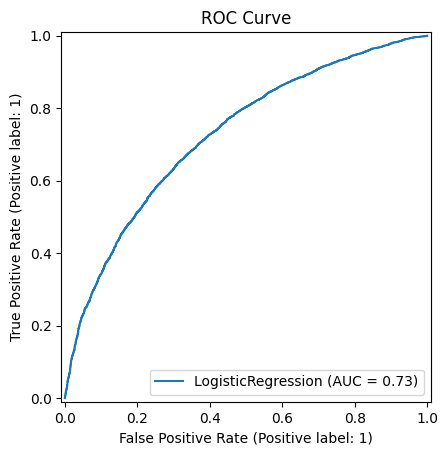

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

print("\n--- Model Evaluation ---")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(f"Precision: {precision_score(y_test, y_pred):.4f}")
print(f"Recall: {recall_score(y_test, y_pred):.4f}")
print(f"F1-Score: {f1_score(y_test, y_pred):.4f}")
print(f"ROC AUC Score: {roc_auc_score(y_test, y_pred_proba):.4f}")

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# You can also visualize the ROC curve for better understanding
from sklearn.metrics import RocCurveDisplay
import matplotlib.pyplot as plt

# Ensure to use the correct model name (e.g., 'model' in this case)
RocCurveDisplay.from_estimator(model, X_test, y_test)
plt.title('ROC Curve')
plt.show()

2.10 Hyperparameter Tuning (Optional but Recommended)

Action: Use techniques like GridSearchCV or RandomizedSearchCV.

In [ ]:
from sklearn.model_selection import GridSearchCV

# Example for Logistic Regression
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100], # Inverse of regularization strength
    'solver': ['liblinear', 'lbfgs']
}

grid_search = GridSearchCV(LogisticRegression(random_state=42), param_grid, cv=5, scoring='roc_auc', n_jobs=-1)
grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_
print(f"\nBest parameters found: {grid_search.best_params_}")
print(f"Best ROC AUC score: {grid_search.best_score_:.4f}")

# You would then use best_model for predictions and final evaluation


Best parameters found: {'C': 0.01, 'solver': 'lbfgs'}
Best ROC AUC score: 0.7240


Step 3: Business Interpretation of Coefficients

3.1 Understand Logistic Regression Coefficients

3.2 Extract and Display Coefficients

In [ ]:
import pandas as pd
import numpy as np

# Assuming 'best_model' is your final trained Logistic Regression model
# If not using hyperparameter tuning, replace 'best_model' with 'model'

final_model = best_model # or 'model' if you didn't do grid search

# Get the coefficients and feature names

coefficients = final_model.coef_[0] # For binary classification, coef_ is usually 2D array, take the first row
feature_names = X_train.columns # Use X_train columns as they are the features used in training

# Create a DataFrame for better readability

coef_df = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coefficients,
    'Odds_Ratio': np.exp(coefficients) # Calculate odds ratios
})

# Sort by absolute coefficient value to see most influential features

coef_df['Abs_Coefficient'] = np.abs(coef_df['Coefficient'])
coef_df = coef_df.sort_values(by='Abs_Coefficient', ascending=False)

print("\n--- Model Coefficients and Odds Ratios ---")
print(coef_df[['Feature', 'Coefficient', 'Odds_Ratio']].to_string(index=False))


--- Model Coefficients and Odds Ratios ---
   Feature  Coefficient  Odds_Ratio
   AGE_CAR     0.820844    2.272417
ANN_INCOME     0.416478    1.516611
  GENDER_M     0.192008    1.211680
  CURR_AGE    -0.135778    0.873036


3.3 Interpret Numerical Coefficients (e.g., CURR_AGE, ANN_INCOME, AGE_CAR)

3.4 Interpret Categorical Coefficients (e.g., GENDER_M)

3.5 Translate to Business Insights and Recommendations

Step 4: Metrics for Model Validation, Performance, and Evaluation

4.1 Understanding the Confusion Matrix


--- Confusion Matrix ---
[[2695 2396]
 [1486 5423]]


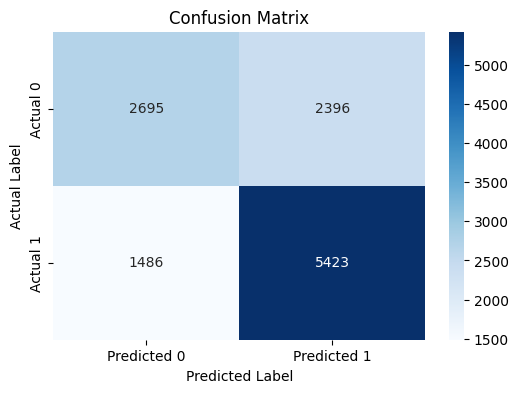

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming y_test and y_pred are available from Step 2.8

cm = confusion_matrix(y_test, y_pred)
print("\n--- Confusion Matrix ---")
print(cm)

# Optional: Visualize the confusion matrix

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix')
plt.show()

4.2 Key Classification Metrics


--- Comprehensive Model Performance Metrics ---
Accuracy: 0.6765
Precision: 0.6936
Recall: 0.7849
F1-Score: 0.7364
ROC AUC Score: 0.7271

--- ROC Curve ---


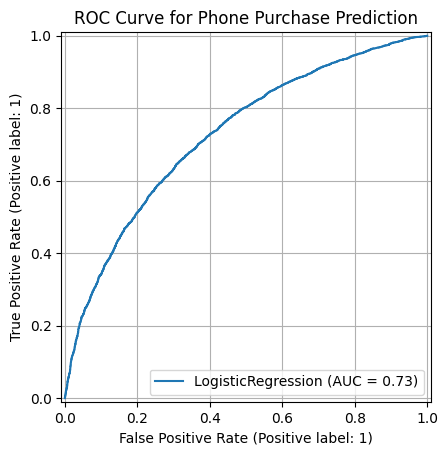

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import RocCurveDisplay # For plotting ROC curve

# Assuming y_test, y_pred, and y_pred_proba are available from Step 2.8

print("\n--- Comprehensive Model Performance Metrics ---")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(f"Precision: {precision_score(y_test, y_pred):.4f}")
print(f"Recall: {recall_score(y_test, y_pred):.4f}")
print(f"F1-Score: {f1_score(y_test, y_pred):.4f}")
print(f"ROC AUC Score: {roc_auc_score(y_test, y_pred_proba):.4f}")

# Plotting ROC Curve
print("\n--- ROC Curve ---")
RocCurveDisplay.from_estimator(final_model, X_test, y_test) # Use your final trained model (e.g., 'final_model' or 'best_model')
plt.title('ROC Curve for Phone Purchase Prediction')
plt.grid(True)
plt.show()

4.3 Cross-Validation for Robust Evaluation

In [ ]:
from sklearn.model_selection import cross_val_score, KFold

# Define the cross-validation strategy (e.g., 5 folds)
cv = KFold(n_splits=5, shuffle=True, random_state=42)

# Perform cross-validation and get scores for desired metrics
# Using your final_model (e.g., LogisticRegression)
accuracy_scores = cross_val_score(final_model, X, y, cv=cv, scoring='accuracy', n_jobs=-1)
precision_scores = cross_val_score(final_model, X, y, cv=cv, scoring='precision', n_jobs=-1)
recall_scores = cross_val_score(final_model, X, y, cv=cv, scoring='recall', n_jobs=-1)
f1_scores = cross_val_score(final_model, X, y, cv=cv, scoring='f1', n_jobs=-1)
roc_auc_scores = cross_val_score(final_model, X, y, cv=cv, scoring='roc_auc', n_jobs=-1)

print("\n--- Cross-Validation Results (5-Fold) ---")
print(f"Average Accuracy: {accuracy_scores.mean():.4f} (+/- {accuracy_scores.std() * 2:.4f})")
print(f"Average Precision: {precision_scores.mean():.4f} (+/- {precision_scores.std() * 2:.4f})")
print(f"Average Recall: {recall_scores.mean():.4f} (+/- {recall_scores.std() * 2:.4f})")
print(f"Average F1-Score: {f1_scores.mean():.4f} (+/- {f1_scores.std() * 2:.4f})")
print(f"Average ROC AUC Score: {roc_auc_scores.mean():.4f} (+/- {roc_auc_scores.std() * 2:.4f})")


--- Cross-Validation Results (5-Fold) ---
Average Accuracy: 0.6732 (+/- 0.0133)
Average Precision: 0.6911 (+/- 0.0173)
Average Recall: 0.7819 (+/- 0.0132)
Average F1-Score: 0.7337 (+/- 0.0121)
Average ROC AUC Score: 0.7246 (+/- 0.0160)


Step 5: Count of Potential Customers in the Indian Market

5.1 Load and Prepare the Indian Dataset (Consistent Preprocessing)


In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
import numpy as np # For potential use with numerical operations

# 1. Load the Indian Dataset
try:
    df_india = pd.read_csv('IN_Data.csv')
    print("Indian dataset loaded successfully for prediction.")
except FileNotFoundError:
    print("Error: IN_Data.csv not found. Please ensure the file is in the correct directory.")

# 2. Perform initial checks (EDA) for Indian Dataset
print("\n--- Indian Dataset Overview for Preprocessing ---")
print("First 5 rows:")
print(df_india.head())
print("\nColumn information (data types, non-null counts):")
print(df_india.info())
print("\nMissing values count per column:")
print(df_india.isnull().sum())

# --- Important: Apply the same cleaning and preprocessing as Japanese Dataset ---

# Assume 'ANN_INCOME' exists and needs cleaning in IN_Data.csv too
# (Adjust column names based on your actual IN_Data.csv structure)
if 'ANN_INCOME' in df_india.columns and df_india['ANN_INCOME'].dtype == 'object':
    df_india['ANN_INCOME'] = df_india['ANN_INCOME'].str.replace(',', '').astype(float)
    print("ANN_INCOME column in Indian dataset cleaned and converted to numeric.")

# Drop 'ID' column if it exists and is not a feature for prediction
if 'ID' in df_india.columns:
    df_india_processed = df_india.drop('ID', axis=1)
    print("ID column dropped from Indian dataset.")
else:
    df_india_processed = df_india.copy()

# Apply One-Hot Encoding for categorical columns, consistent with Japanese dataset
# (Adjust 'GENDER' to actual categorical columns in IN_Data.csv)
categorical_cols_india = ['GENDER'] # Assuming 'GENDER' is the only categorical feature like in JPN_Data
df_india_processed = pd.get_dummies(df_india_processed, columns=categorical_cols_india, drop_first=True)
print("Categorical columns in Indian dataset one-hot encoded.")

# Align columns with the Japanese dataset's X_train columns
# This is crucial if some one-hot encoded columns are not present in one dataset but are in the other
# or if feature engineering created columns.
# Ensure X_train from JPN dataset is defined from previous steps
# For example, if X_train had 'GENDER_F' and 'GENDER_M', ensure df_india_processed has 'GENDER_M' (if drop_first=True)
# Get the columns from the training data (Japanese dataset)
# Replace 'X' with 'X_train' if you used X_train for training the model after splitting
expected_cols = X_train.columns.tolist() # Assuming X_train holds the processed features from JPN dataset

# Add missing columns (if any) and fill with 0
missing_cols = set(expected_cols) - set(df_india_processed.columns)
for c in missing_cols:
    df_india_processed[c] = 0

# Remove extra columns (if any) not in the training data
extra_cols = set(df_india_processed.columns) - set(expected_cols)
df_india_processed = df_india_processed.drop(columns=list(extra_cols))

# Ensure the order of columns is the same as the training data
df_india_processed = df_india_processed[expected_cols]

print("\nIndian dataset columns aligned with Japanese model features.")
print("Indian dataset (first 5 rows) after initial preprocessing:")
print(df_india_processed.head())


# Apply the SAME StandardScaler fitted on Japanese training data
# Ensure 'scaler' object is available from Step 2.5
# Identify numerical columns (consistent with how they were scaled in JPN data)
numerical_cols_india = ['CURR_AGE', 'ANN_INCOME', 'AGE_CAR'] # Adjust as per your data if different

# Transform numerical features using the scaler fitted on JPN X_train
if 'scaler' in locals() and scaler is not None:
    df_india_processed[numerical_cols_india] = scaler.transform(df_india_processed[numerical_cols_india])
    print("\nNumerical features in Indian dataset scaled using Japanese model's scaler.")
    print("\nIndian dataset (first 5 rows) after scaling:")
    print(df_india_processed.head())
else:
    print("\nScaler not found. Please ensure 'scaler' from JPN dataset training is available.")
    # You would need to re-run the scaling section from Step 2.5 if 'scaler' is not in memory

Indian dataset loaded successfully for prediction.

--- Indian Dataset Overview for Preprocessing ---
First 5 rows:
           ID  CURR_AGE GENDER   ANN_INCOME   DT_MAINT
0  20710B05XL        54      M   1,425,390   4/20/2018
1  89602T51HX        47      M   1,678,954    6/8/2018
2  70190Z52IP        60      M     931,624   7/31/2017
3  25623V15MU        55      F   1,106,320   7/31/2017
4  36230I68CE        32      F     748,465   1/27/2019

Column information (data types, non-null counts):
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   ID          70000 non-null  object
 1   CURR_AGE    70000 non-null  int64 
 2   GENDER      70000 non-null  object
 3   ANN_INCOME  70000 non-null  object
 4   DT_MAINT    70000 non-null  object
dtypes: int64(1), object(4)
memory usage: 2.7+ MB
None

Missing values count per column:
ID            0
CURR_AGE  

5.2 Apply the Trained Japanese Model to Predict Probabilities

In [ ]:
# Ensure 'final_model' (or 'best_model' / 'model') is available from Step 2.7 or 2.10
if 'final_model' in locals() and final_model is not None:
    india_pred_proba = final_model.predict_proba(df_india_processed)[:, 1] # Probability of positive class (purchase)
    df_india['Purchase_Probability'] = india_pred_proba # Add probabilities back to original df_india or a new one

    print("\nPurchase probabilities predicted for Indian customers.")
    print("\nIndian Dataset with Purchase Probabilities (first 5 rows):")
    print(df_india[['ID', 'Purchase_Probability']].head())
else:
    print("\nFinal trained model not found. Please ensure your model from Step 2 is available.")


Purchase probabilities predicted for Indian customers.

Indian Dataset with Purchase Probabilities (first 5 rows):
           ID  Purchase_Probability
0  20710B05XL              0.811367
1  89602T51HX              0.895025
2  70190Z52IP              0.553382
3  25623V15MU              0.621466
4  36230I68CE              0.477122


5.3 Define a Probability Threshold

In [ ]:
# Example Threshold: 0.5
threshold = 0.5
print(f"\nUsing a probability threshold of: {threshold}")

df_india['Is_Potential_Customer'] = (df_india['Purchase_Probability'] >= threshold).astype(int)

print("\nIndian Dataset with Potential Customer Flag (first 5 rows):")
print(df_india[['ID', 'Purchase_Probability', 'Is_Potential_Customer']].head())


Using a probability threshold of: 0.5

Indian Dataset with Potential Customer Flag (first 5 rows):
           ID  Purchase_Probability  Is_Potential_Customer
0  20710B05XL              0.811367                      1
1  89602T51HX              0.895025                      1
2  70190Z52IP              0.553382                      1
3  25623V15MU              0.621466                      1
4  36230I68CE              0.477122                      0


5.4 Count Potential Customers

In [ ]:
potential_customer_count = df_india['Is_Potential_Customer'].sum()

print(f"\nTotal potential customers in the Indian market (based on phone purchase model): {potential_customer_count}")


Total potential customers in the Indian market (based on phone purchase model): 55881


5.5 Relate to Car Sales Forecast (Business Context)

Step 6: Visualization using Power BI

6.1 Prepare Data for Power BI

In [ ]:
# Ensure df_japan is the final processed Japanese DataFrame

df_japan.to_csv('JPN_Processed_Data.csv', index=False)
print("Processed Japanese data saved to JPN_Processed_Data.csv")

# Ensure df_india is the final processed Indian DataFrame with probabilities and potential customer flags

df_india.to_csv('IN_Processed_Data.csv', index=False)
print("Processed Indian data saved to IN_Processed_Data.csv")

Processed Japanese data saved to JPN_Processed_Data.csv
Processed Indian data saved to IN_Processed_Data.csv
